# Lista 2 (7 pkt.)

In [1]:
import string
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Zadanie 1. (1 pkt)

To zadanie należy wykonać ręcznie, bez używania komputera, korzystając z instrukcji z **one_time_pad.pdf**. Zaszyfruj wiadomość o treści: "NEW 15 HELICOPTERS.", za pomocą klucza: 68496 47757 10126 36660 25066. Do słów, które są w tabeli poniżej użyj odpowiednio ich kodów. Uwaga: w wiadomości jest liczba mnoga "helicopterS".

$\begin{array}{|c|c|c|c|c|c|c|c|c|c|}
\hline
CODE&A&E&I&N&O&T&&\\
0&1&2&3&4&5&6&&&\\
\hline
B&C&D&F&G&H&J&K&L&M\\
70&71&72&73&74&75&76&77&78&79\\
\hline
P&Q&R&S&U&V&W&X&Y&Z\\
80&81&82&83&84&85&86&87&88&89\\
\hline
FIG&.&:&,/'&(/)&+&-&=&REG/?&SPC\\
90&91&92&93&94&95&96&97&98&99\\
\hline
\end{array}$

$\begin{array}{|cc|cc|cc|cc|}
\hline
000&ABORT&253&DECODE&505&MILITARY&758&STREET\\
\hline
019&ACCEPT&262&DELAY&514&MONEY&767&SUBWAY\\
\hline
028&ACCESS&271&DIFFICULT&523&MONTH&776&SUCCESS\\
\hline
037&ADDRESS&280&DOCUMENT&532&MORNING&785&SUPPLY\\
\hline
046&AFFIRMATIVE&299&ENCODE&541&MORSE&794&SUPPORT\\
\hline
055&AGENT&307&EVENING&550&NEGATIVE&802&TELEPHONE\\
\hline
064&AIRPLANE&316&EXECUTE&569&NIGHT&811&TODAY\\
\hline
073&AIRPORT&325&FACTORY&578&OBSERVATION&820&TOMORROW\\
\hline
082&ANSWER&334&FAILED&587&PASSPORT&839&TRAIN\\
\hline
091&AUTHORITY&343&FERRY&596&PERSON&848&TRANSFER\\
\hline
109&BETWEEN&352&FLIGHT&604&PHOTOGRAPH&857&TRANSMIT\\
\hline
118&BORDER&361&FREQUENCY&613&POSITIVE&866&TRAVEL\\
\hline
127&BUILDING&370&HARBOUR&622&POSSIBLE&875&TRUCK\\
\hline
136&CANCEL&389&HELICOPTER&631&POWER&884&UNABLE TO\\
\hline
145&CHANGE&398&HIGHWAY&640&PRIORITY&893&URGENT\\
\hline
154&CIVILIAN&406&IDENTITY&659&PROBLEM&901&VERIFY\\
\hline
163&COMPROMISE&415&IMMEDIATE&668&QUESTION&910&WEEK\\
\hline
172&COMPUTER&424&IMPOSSIBLE&677&RADIO&929&WITHIN\\
\hline
181&CONFIRM&433&INFORMATION&686&RECEIVE&938&YESTERDAY\\
\hline
190&CONTACT&442&INSTRUCTIONS&695&RENDEZVOUS&&\\
\hline
208&COORDINATE&451&LOCATE&703&REPEAT&&\\
\hline
217&COUNTRY&460&LOCATION&712&RESERVATION&&\\
\hline
226&COVERT&479&MAIL&721&ROUTINE&\\
\hline
235&CURRENT&488&MEETING&730&SATELLITE&\\
\hline
244&DANGER&497&MESSAGE&749&SHIP&\\
\hline
\end{array}$

N E W  FIG  1   5  FIG HELICOPTERS  .  
4 2 86 90  111 555 90  0389      83 91  
<pre>
Plaincode: 42869 01115 55900 38983 91  
OTP: 68496 47757 10126 36660 25066  
=    68496 05112 91099 29340 13927

Bez KEYID  
Plaincode: 42869 01115 55900 38983 91  
OTP:       68496 47757 10126 36660 25066  
=          84473 64468 40884 02323 76
</pre>

## Zadanie 2 (1 pkt)

To zadanie również jest do zrobienia ręcznie. Używając klucza 11454 03055 15565 17466 26950 54906 odkoduj wiadomość 11454 00572 94578 25863 84286 24376. Wykorzystaj instrukcje z one_time_pad.pdf oraz tablicę kodów z Zadania 1.

<pre>
enc = 11454 00572 94578 25863 84286 24376
key = 11454 03055 15565 17466 26950 54906
dec = 22808 03527 09033 32229 00136 78272

0352   70 90 333 222 90 0136  78 2 72
FLIGHT B      3   2     CANCEL L E D

</pre>
ODP:  
FLIGHT B32 CANCELLED

## Zadanie 3. (1 pkt)

Wczytaj obrazki 'miki.png' oraz 'quest.png'.

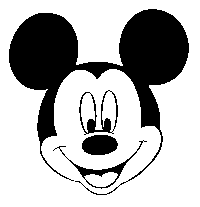

In [2]:
img1 = Image.open('miki.png').convert('L')
img1

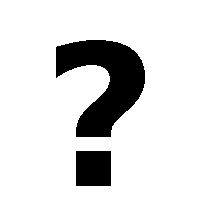

In [3]:
img2 = Image.open('quest.png').convert('L')
img2

Napisz funkcję **add_pic(img1, img2)**, która przyjmuje dwa obrazki i je dodaje piksel po pikselu za pomocą XOR, czyli **biały+biały=czarny, biały+czarny=biały, czarny+czarny=czarny**. Warto wykorzystać to, że **np.array(img)** zwraca tablicę, z wartościami 255 dla białych pikseli i 0 dla czarnych, aby zamienić tablicę z powrotem na obraz należy użyc **Image.fromarray()** przy czym tablica musi być typu **np.uint8** czyli tworząc tablicę podajemy typ: **np.array([1,2,3,4], dtype=np.uint8)**. Funkcja ma zwracać obrazek.

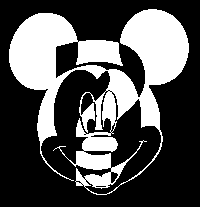

In [4]:
def add_pic(img1, img2):
    assert img1.size == img2.size
    imA = np.array(img1)
    imB = np.array(img2)
    imC = np.zeros_like(imA,dtype=np.uint8)
    resolution = imA.shape
    for x in range(resolution[0]):
        for y in range(resolution[1]):
            value = np.uint8(255)
            if imA[x][y] == imB[x][y]:
                value = np.uint8(0)
            imC[x][y] = value
    image = Image.fromarray(imC)
    return image
add_pic(img1,img2)

Wygeneruj (pseudo)losowy klucz, czyli obrazek z losowymi białymi i czarnymi pikselami, użyj **np.random**. Następnie zaszyfruj tym kluczem, za pomocą **add_pic**, oba obrazki **img1** i **img2**. Zauważ, że oba obrazki wyglądają na dobrze zaszyfrowane, zobacz jednak co się wydarzy kiedy dodasz do siebie te zaszyfrowane obrazki.

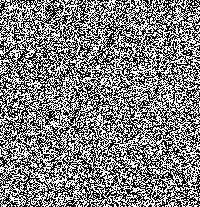

In [5]:
random_img = Image.fromarray(np.random.choice([0, 255], size=img1.size).astype(np.uint8).T)
random_img

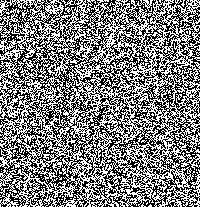

In [6]:
add_pic(random_img,img1)

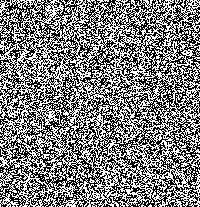

In [7]:
add_pic(random_img, img2)


## Zadanie 4 (2 pkt.)

Zmienne ***msg1_enc*** oraz ***msg2_enc*** zawierają dwie zaszyfrowane wiadomości, w języku angielskim.

In [8]:
msg1_enc = '\x1e\x17\x0c\x12\x1b\x08\x0cf\x0e\x11x\x1a\x1c\x12o\x06\x18\x1f\x17\x03\x10\x01fkh\x1f\x08'
msg2_enc = '\x0b\ni\x07\x1c\x02k\x1f\x16e\x01\x0b\x07\x03\n\x15\x15\x0c\x1el\x07\x03\x03\x16\x01\x01\x02'
len(msg1_enc)
len(msg2_enc)

27

Wiadomo, że zostały zaszyfrowane tym samym kluczem, możemy to wykorzystać do odszyfrowania ich. W tym zadaniu konwencja zamiany liter na liczby i ich dodawania jest inna, niż w poprzednich. Znaki zamieniamy na liczby kodujące te znaki w **Unicode**, czyli za pomocą **ord()**, następnie dodajemy je do siebie za pomocą XOR na poziomie bitów, czyli za pomocą **^**. Napisz funkcję **add_str(msg1, msg2)**, które przyjmuje dwa teksty i zwraca tekst będący sumą tych tekstów zgodnie z powyższą konwencją.

In [9]:
def add_str(msg1, msg2):
    assert len(msg1) == len(msg2)
    res = ""
    for i in range(len(msg1)):
        c = ord(msg1[i]) ^ ord(msg2[i])
        res += chr(c)
    return res

print(add_str(msg1_enc,msg2_enc))

e
	oe}i



Zauważmy, że jeżeli dwie wiadomości są zaszyfrowane tym samym kluczem to dodanie ich do siebie sprawia, że dostaniemy sumę wiadomości bez klucza. Poza tym zauważmy, że jeżeli znamy jakieś słowo występujące w którejś z wiadomości i je dodamy do sumy tych wiadomości w odpowiednim miejscu to w wyniku dostaniemy poprawne słowo z drugiej wiadomości. Zatem metoda łamania tych wiadomości jest następująca, zgadujemy jakie słowo może być w którejś z wiadomości, dodajemy je w różnych miejscach sumy wiadomości i patrzymy czy powstaje coś co może być fragmentem poprawnego tekstu, następnie na podstawie tego fragmentu zgadujemy większą pozostałą część słowa i teraz to słowo używamy do odczytania kolejnego fragmentu z pierwszej wiadomości.

Pierwsze słowo wybieramy z pośród najpopularniejszych słów w danym języku.

Najpopularniejsze angielskie słowa:
1. THE
2. BE
3. TO
4. OF
5. AND

Uwaga 1: Słowa zapisane są drukowanymi literami.

Uwaga 2: Słowa oddzialane są spacjami, zatem biorąc np. słowo THE należy sprawdzać ciąg znaków "&nbsp; THE &nbsp;", ze spacjami na początku i końcu, dzięki temu odszyfrujemy więcej znaków.

In [45]:
popular_words = [" THE ", " BE ", " TO ", " OF ", " AND "]
def print_word_sums(word1, word2, popular_words):
    
    keysum = add_str(word1,word2)
    n = len(keysum)
    for word in popular_words:
        print(f"{word}:")
        m= len(word)
        for i in range(n-m+1):
            s = (
                add_str(keysum[i : i + m], word)
                .replace("\n", "-")
                .replace("\r", "-")
            )
            allowed_chars = string.ascii_letters.join(string.whitespace)
            if all(c in allowed_chars for c in s):
                print(f"|{i}\"{s}\"",end="|")
            if i%1000==999:
                print("")
        print("")
        
print_word_sums(msg1_enc,msg2_enc, popular_words)

 THE :
|2"EAOOG"||10"YESTE"|
 BE :
|19"OUGE"|
 TO :
|19"OCME"|
 OF :
|19"OXDE"|
 AND :
|2"ETING"||10"YPUUE"|


In [11]:
keysum = add_str(msg1_enc, msg2_enc)
def section_add_str(keysum,start,word):
    print(add_str(keysum[start:start+len(word)], word))
    
section_add_str(keysum,9, " YESTERDAY ")
section_add_str(keysum, 9, "T THE AIRPORT 3 PM")
section_add_str(keysum, 3, "TING ")
section_add_str(keysum, 2, " AND Y")
section_add_str(keysum, 0, "MEETING AT THE AIRPORT 3 PM")
section_add_str(keysum, 0, "XX AND YY YESTERDAY EVENING")



T THE AIRPO
 YESTERDAY EVENING
AND Y
ETING 
XX AND YY YESTERDAY EVENING
MEETING AT THE AIRPORT 3 PM


## Zadanie 5 (2 pkt.)

W poprzednim zadaniu korzystaliśmu z faktu, że obie wiadomości były zaszyfrowane przy użyciu tego samego klucza. Jednka w praktyce nie wiemy, które i czy w ogóle, wiadomosci były zaszyfrowane przy użyciu tego samego klucza. Możemy to wykryć dokonując analizy statystycznej. Załóżmy, że dodajemy do siebie dwie wiadomości zaszyfrowane tymi samymi kluczami. Wtedy miejsca w których dostaniemy 0 (w konwencji użytej w tym zadaniu znak odpowiadający 0 w Unicode, czyli chr(0)) są miejscami w których w obu wiadomościach była ta sama litera. Jeżeli natomiast dodajemy wiadomości o różnych kluczach będziemy dostawać 0 w losowych miejscach. Zatem w pierwszym przypadku otrzymamy więcej 0.

Zatem należy wczytać wszystkie wiadomości msg1.txt, msg2.txt itd. a następnie dodać je do siebie parami, każda z każdą i policzyć odsetek 0 (tzn. znaków chr(0)) w otrzymanych sumach. Para wiadomości o wyższym niż inne odsetku będzie tą zaszyfrowaną przy u życiu tego samego klucza. Aby łatwiej zauważyć taką parę warto zilustrować sobie wyniki (odsetki 0) za pomocą **plt.imshow(X ,norm=LogNorm())** i użyć skali logarytmicznej, gdzie **X** to tablica 10 na 10 zawierająca odsetki 0 dla każdej pary wiadomości.

In [12]:
msgs = []
for i in range(10):
    with open(f"msg{i}.txt", "r")as f:
        msgs.append(f.read())

zeros = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        if i==j:
            continue
        s = add_str(msgs[i],msgs[j])
        matches = 0
        for c in s:
            if ord(c) == 0:
                matches += 1
        zeros[i][j] = matches / len(s)

In [13]:
zeros

array([[0.        , 0.01815024, 0.01745549, 0.01754234, 0.01893183,
        0.01693443, 0.01537125, 0.01823708, 0.01597916, 0.01823708],
       [0.01815024, 0.        , 0.01615284, 0.01710812, 0.01728181,
        0.0180634 , 0.01841077, 0.01493704, 0.01728181, 0.01762918],
       [0.01745549, 0.01615284, 0.        , 0.01693443, 0.01580547,
        0.01736865, 0.01710812, 0.01424229, 0.01693443, 0.01702128],
       [0.01754234, 0.01710812, 0.01693443, 0.        , 0.01745549,
        0.01597916, 0.0154581 , 0.01693443, 0.05132436, 0.01684759],
       [0.01893183, 0.01728181, 0.01580547, 0.01745549, 0.        ,
        0.01910551, 0.01476335, 0.01467651, 0.01458967, 0.0166739 ],
       [0.01693443, 0.0180634 , 0.01736865, 0.01597916, 0.01910551,
        0.        , 0.01458967, 0.01650022, 0.01684759, 0.01710812],
       [0.01537125, 0.01841077, 0.01710812, 0.0154581 , 0.01476335,
        0.01458967, 0.        , 0.01676075, 0.01597916, 0.01563178],
       [0.01823708, 0.01493704, 0.0142422

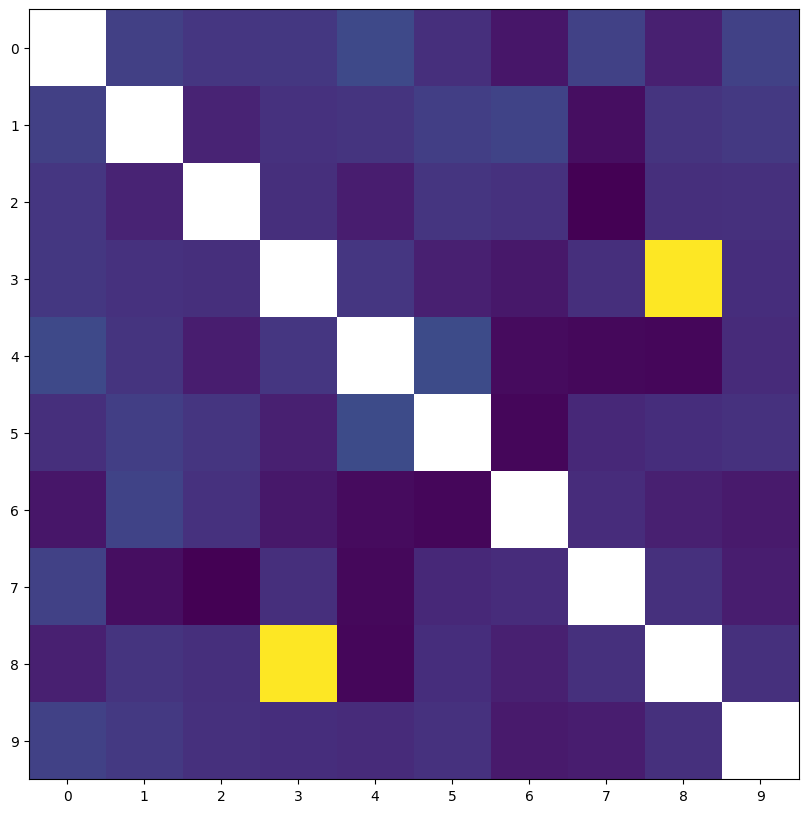

0.051324359531046464


In [32]:
plt.figure(figsize=(10, 10))
im = plt.imshow(zeros, norm=LogNorm(), interpolation="none")
plt.xticks(ticks=np.arange(zeros.shape[1]), labels=np.arange(zeros.shape[1]))
plt.yticks(ticks=np.arange(zeros.shape[0]), labels=np.arange(zeros.shape[0]))
plt.show()
print(zeros[3][8])

In [33]:
A = msgs[8]
B = msgs[3]
ks = add_str(A,B)

In [ ]:
print_word_sums(A,B,popular_words=[" się "])

 się :
|23"e nie"||141"stwem"||201"wfwm "||344"i zna"||363" unht"||533" znow"||547"ch za"||569"zgiuk"||786" Menf"||917"caimt"||951"ztayo"|
|1190"kviKd"||1341"oiywa"||1528"rony "||1680"notam"||1771"panti"||1974"mhyoj"||1978"juj k"|
|2052"tr pu"||2548"pywab"||2704"hwyci"||2757"go do"||2781"yn ro"||2819"z Pen"|
|3146"kilkm"||3561"ewczy"||3867" rdol"||3937"kocha"|
|4147"w z E"||4426" szmm"||4773"rsiac"|
|5181"moyoi"||5235"wadzi"||5345"tego "||5433"wdlek"||5511"jskic"||5799"rsuse"|
|6138"ojsko"||6385"tUCHe"||6537" wiem"||6673"ocias"||6689"Wielk"||6813"estch"||6965"iw tc"|
|7019"lfhzk"||7199"nicy "||7287"ymiEn"||7380"przys"||7510"isrKw"||7941"tkka "|
|8059"yszel"||8165" zapu"||8224"ma pc"||8332"zu ni"||8368"dun "||8574"  iyp"||8620" sinp"||8636" okre"||8661"zPyEm"||8697"wwqsk"||8718" fckn"||8931"imi r"|
|9129"ejrzy"||9192"e do "||9287"drcfw"||9380"idywa"||9606"dmzwe"||9610"ejiec"||9972"gle v"|
|10484"adli "||10987" Odpo"|
|11027"ijcie"||11241"ej dc"|


Takie same słowo w obu wiadomościach

In [35]:
section_add_str(ks,7365,"AAAAAA")

AAAAAA


In [164]:
section_add_str(ks,23,"e nie ")
section_add_str(ks, 141, "stwem ")
section_add_str(ks, 142, "się do ")
section_add_str(ks, 139, "ępstwem ")
section_add_str(ks, 137, " państwem ")
section_add_str(ks, 134, " zabrał się do")
section_add_str(ks, 131, "   ą i państwem rządz")
section_add_str(ks, 134, " zabrał się do sypania")
section_add_str(ks, 131, "   ą i państwem rządzę ja ")
section_add_str(ks, 134, " zabrał się do sypania. ")
section_add_str(ks, 131, "   ą i państwem rządzę ja piasku")
section_add_str(ks, 130, "     zabrał się do sypania. ")


 się ,
 się d
twem rz
ęv się d
brał się d
ą i państwem r
=:< zabrał się do syp
ą i państwem rządzę ja
=:< zabrał się do sypania.
ą i państwem rządzę ja p
=:< zabrał się do sypania. Ze mn
=:<ą i państwem rządzę ja p


In [163]:
print_word_sums(A, B, popular_words=[" sobie "])


 sobie :
|171"oiuwbpk"||190" wbbgm "||225" lturys"||389"otbqiin"||705"ulkhwus"||910" Ramzes"|
|1566"lhyjmlt"||1601"y biedn"||1885"dlnlckn"|
|2271"rbytikj"||2491"hblcjaj"||2789"plnlmoo"||2813"PJqbrnz"||2885"cvlkji"||2926" hohzie"|
|3077"ifttmit"||3216"yeg mza"||3330"m bwuis"||3820"ifstfch"|

|5567"ptkich "||5589"zYjjzky"||5619"a Izrae"||5704"spwoofj"||5739" Qlasec"||5932"wqcucue"||5939" efagve"|
|6158"kovsnte"||6682"adtmwmj"||6802" jam pn"||6898" sodgtu"|
|7366" sobiy "||7369" ssbsus"||7847"cyegzet"|
|8209" sqirci"||8520"djobhee"||8672"cyko s "||8895"euoblw "||8907"rmg ab "|

|10139" ftol l"||10312"mhunyw "||10868"eOUQEOC"|
|11032"elegant"||11353"erouddc"|


Testując różne długie najpopularniejsze w polskim języku słowa natknąłem się na fraze Ramzes. Okazuje się ze jest to tekst z "Faraon'a"

In [170]:
section_add_str(ks, 123, "Potem znowu zabrał się do sypania. ")


ie:

- Armią i państwem rządzę ja p


In [178]:
section_add_str(
    ks,
    130,
    "Armią i państwem rządzę ja. Ze mnie płyną wszelkie rozkazy i wyroki. Na tym świecie jestem wagą Ozyrysa i sam ważę sprawy moich sług: następcy, ministra czy ludu. Nieroztropnym byłby ten, kto by sądził, że nie są mi znane wszystkie gwichty",
)

nowu zabrał się do sypania piasku.

Oszołomiony ciosem chłop stracił hdwagę i zaczął błagać:

- Panie - mówił - ależ ten kanał ja sam kopałem przez dziesięć lat nocami i w święta! Nasz pan obiecał, że jeżeli uda mi się przeprowadzić wodę d
